# odeint and linear harmonic oscillator

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.integrate as integrate

## Introduction

A simple first order differential equation of one variable $y$ 

  $$ \frac{dy}{dt} = f(y,t) $$
  
will typically have a "family" of solutions for $y(t)$.  

For a given initial value $y(t=0)=y_0$ we will trace out a specific curve.

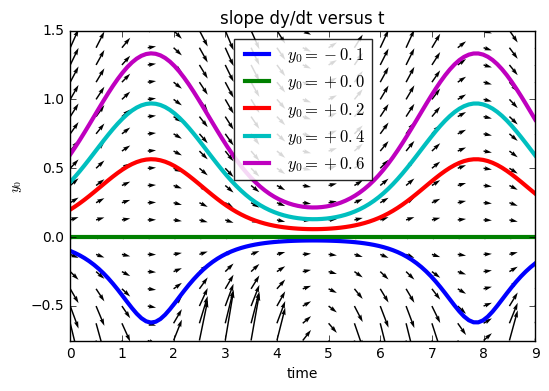

In [22]:
def figure_odeint_vector_field():
    """
    Plot an illustration of the state vector space for a
    one-dimensional ODE using arrows to indicate local slope.
    Also show some example trajectories.
    """
    plt.clf()
    x = np.linspace(0.0, 9.0, 19 )
    y = np.linspace(-0.75, 1.5, 19 )
    
    xx, yy = np.meshgrid( x, y )
    dydx = (yy*1.5 *  np.cos(xx))  / (1.1 + np.sin(yy) ) 
    plt.quiver(xx, yy, 2.0, 4.5*dydx )
    plt.xlabel('time')
    plt.ylabel('$y_0$')
    plt.title('slope dy/dt versus t')
   
    def funcxy(yy, xx):
        dydx = (yy*1.5 *  np.cos(xx))  / (1.1 + np.sin(yy) ) 
        return dydx
    
    x = np.linspace(0.0, 9.0, 99 )      
    for y0 in [-0.1, 0.0, 0.2, 0.4, 0.6]:      
        stack = integrate.odeint( funcxy, (y0,), x )    
        plt.plot( x, stack, '-', lw=3, label='$y_0 = {:+}$'.format(y0))
    plt.legend(loc=0, framealpha=0.85)
    plt.ylim(-0.75,1.5)
    
figure_odeint_vector_field()

### Example: exponential decay

Given the ODE

  $$ \dot y = -y $$
  
we know the solution will be a decaying exponential

  $$ y = y_0 \, e^{-t} $$

This is also the result obtained by numerical integration:

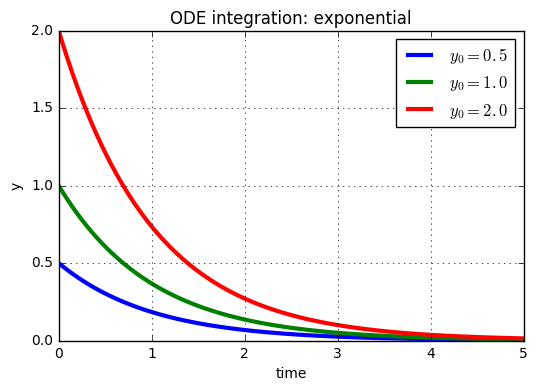

In [24]:
def func_minus_exp(y,t):
    return -y

# This is the set of times for which the state vector will be returned.
# Note that this does *not* control the resolution of the integrator.
#
tlist = np.linspace(0.0, 5, 99)

for y0 in [0.5, 1.0, 2.0]:
    ylist = integrate.odeint( func_minus_exp, y0, tlist)
    plt.plot(tlist, ylist, lw=3, label='$y_0 = {}$'.format(y0) )
    
plt.xlabel('time')
plt.ylabel('y')
plt.title('ODE integration: exponential')
plt.grid('on')
plt.legend( loc=0 )

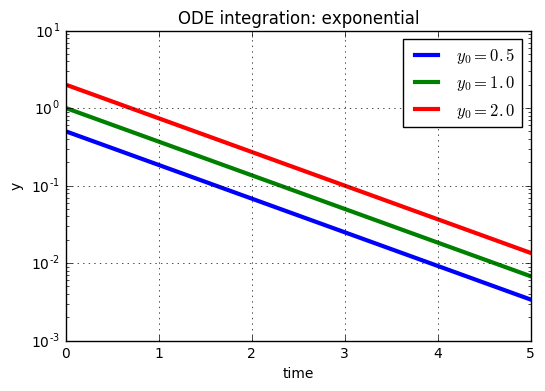

In [26]:
# Plotting an exponential with a logarithmic y-axis 
# should give a straight line.
#

for y0 in [0.5, 1.0, 2.0]:
    ylist = integrate.odeint( func_minus_exp, y0, tlist)
    plt.plot(tlist, ylist, lw=3, label='$y_0 = {}$'.format(y0) )

plt.xlabel('time')
plt.ylabel('y')
plt.title('ODE integration: exponential')
plt.grid('on')
plt.yscale('log')
plt.legend( loc=0 )

## State vector

For systems with two or more physical parameters of interest we can introduce a state vector 

  $$ \vec y = [y_a, y_b, y_c ...] $$
  
which evolves according to a vector equation

  $$ \frac{d \vec y}{dt} = \vec f( \vec y, t)  $$

### Example: spring

The equation of motion for a linear spring relates the displacement $x$ to the restoring force

  $$ \frac{dx^2}{dt^2} = - \omega^2 x $$
  
This second order differential equation can be separated into two coupled first order differential equations

  $$ \dot v = -\omega^2 x $$
  $$ \dot x = v $$
  
for a state vector 

  $$ y = [x, v ] $$ 
  
with time derivative 

  $$ \dot y = [v, -\omega^2 x] $$
  
In other words, we may write the position and velocity as independent quantities, but the derivatives contains all the information about their relationship.

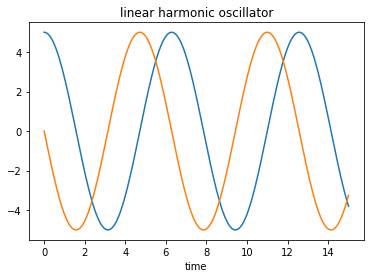

In [8]:
def func_harmonic( state_vector, time, omega=1.0):
    """
    This python function returns the time derivative of the state vector 
    for a linear harmonic oscillator.  It can be called by
    an ODE integrator to determine the system trajectory.
    """
    x, v = state_vector
    deriv = [v, -omega*omega * x]
    return deriv

timesteps = np.linspace(0.0, 15.0, 199)
state_vector_initial = [5.0, 0.0]
state_vector_sequence = integrate.odeint( func_harmonic, state_vector_initial, timesteps )
plt.plot( timesteps, state_vector_sequence)
plt.xlabel('time')
plt.title('linear harmonic oscillator')

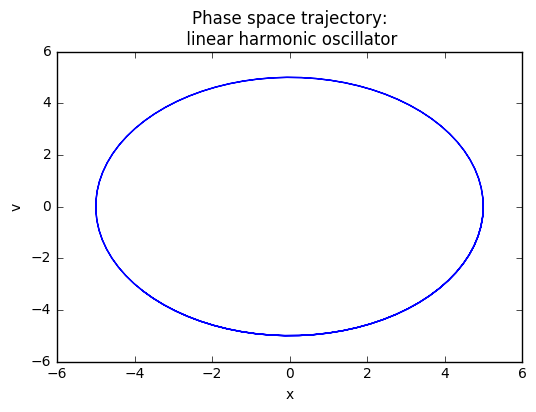

In [49]:
x, v = state_vector_sequence.T
plt.plot(x, v)
plt.title('Phase space trajectory:\n linear harmonic oscillator')
plt.xlabel('x')
plt.ylabel('v')

### Damping term

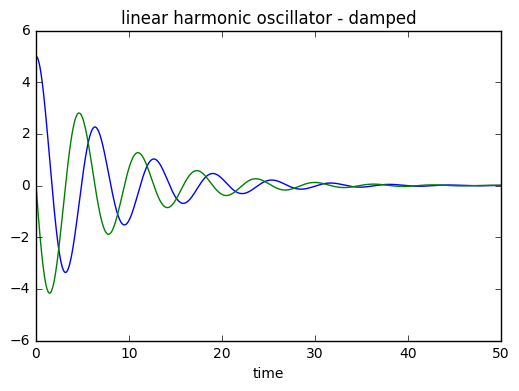

In [50]:
def func_harmonic_damped( state_vector, time, omega=1.0, gamma=0.25):
    """
    This python function returns the time derivative of the state vector 
    for a damped linear harmonic oscillator.  It can be called by
    an ODE integrator to determine the system trajectory.
    """
    x, v = state_vector
    deriv = [v, -omega*omega*x - gamma*v]
    return deriv

timesteps = np.linspace(0.0, 50.0, 999)
state_vector_initial = [5.0, 0.0]
state_vector_sequence = integrate.odeint( func_harmonic_damped, state_vector_initial, timesteps )

plt.plot( timesteps, state_vector_sequence)
plt.xlabel('time')
plt.title('linear harmonic oscillator - damped')

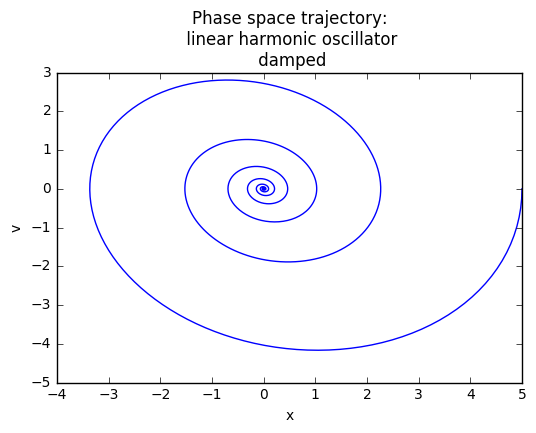

In [51]:
x, v = state_vector_sequence.T
plt.plot(x, v)
plt.title('Phase space trajectory:\n linear harmonic oscillator\n damped')
plt.xlabel('x')
plt.ylabel('v')

### Driving term - away from resonance

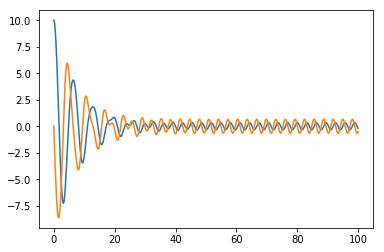

In [25]:
def func_harmonic_damped_driven( state_vector, time, omega=1.0, gamma=0.25, omega_0=2.0):
    """
    This python function returns the time derivative of the state vector 
    for a damped+driven linear harmonic oscillator.  It can be called by
    an ODE integrator to determine the system trajectory.
    """
    x, v = state_vector
    deriv = [v, -omega*omega*x - gamma*v + 1.0 * np.cos(omega_0*time)]
    return deriv

timesteps = np.linspace(0.0, 100.0, 999)
state_vector_initial = [10.0, 0.0]
state_vector_sequence = integrate.odeint( func_harmonic_damped_driven, state_vector_initial, timesteps )

plt.plot( timesteps, state_vector_sequence)

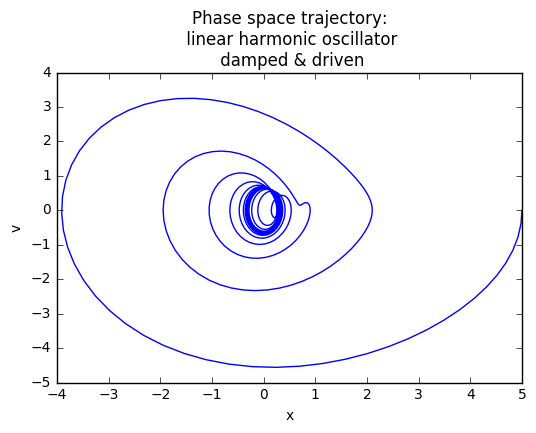

In [53]:
x, v = state_vector_sequence.T
plt.plot(x, v)
plt.title('Phase space trajectory:\n linear harmonic oscillator\n damped & driven')
plt.xlabel('x')
plt.ylabel('v')

In [ ]:
### Driving term - near from resonance

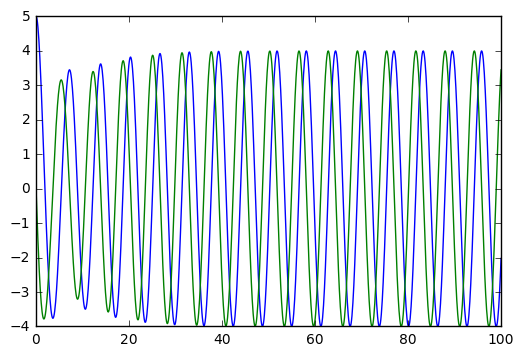

In [54]:
def func_harmonic_damped_driven( state_vector, time, omega=1.0, gamma=0.25, omega_0=1.0):
    """
    This python function returns the time derivative of the state vector 
    for a damped+driven linear harmonic oscillator.  It can be called by
    an ODE integrator to determine the system trajectory.
    """
    x, v = state_vector
    deriv = [v, -omega*omega*x - gamma*v + 1.0 * np.cos(omega_0*time)]
    return deriv

timesteps = np.linspace(0.0, 100.0, 999)
state_vector_initial = [5.0, 0.0]
state_vector_sequence = integrate.odeint( func_harmonic_damped_driven, state_vector_initial, timesteps )

plt.plot( timesteps, state_vector_sequence)

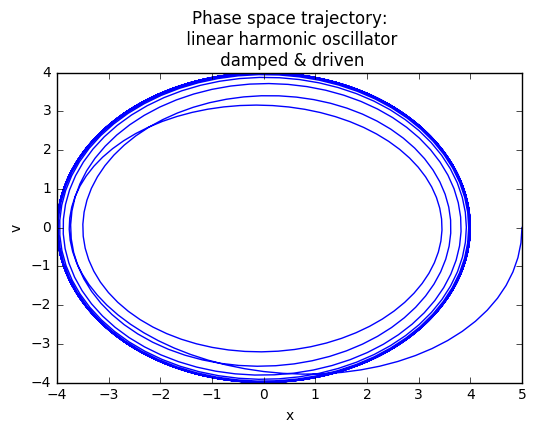

In [44]:
x, v = state_vector_sequence.T
plt.plot(x, v)
plt.title('Phase space trajectory:\n linear harmonic oscillator\n damped & driven')
plt.xlabel('x')
plt.ylabel('v')

# Assignment \#4

Due 11:30pm Wednesday February 15

Write a complete Jupyter notebook containing the code required to generate a resonance plot like the one shown in 

    https://en.wikipedia.org/wiki/Harmonic_oscillator
    
Include all relevant equations, explain each step, document all code.

You may take any material from my notes.  If you use anything else (including wikipedia) then make sure that you include a reference or link.

In [ ]:

https://en.wikipedia.org/wiki/File:Mplwp_resonance_zeta_envelope.svg


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/Mplwp_resonance_zeta_envelope.svg/900px-Mplwp_resonance_zeta_envelope.svg.png">